In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as Functional
import torch.optim as optim
from torchvision.utils import save_image
import os
%matplotlib inline

In [2]:
num_epochs = 10
batch_size = 128
learning_rate = 1e-3
IsCuda = torch.cuda.is_available()

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = torchvision.datasets.MNIST(root = './data', train = True,
                                       download = True, transform = transform)

data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)



In [4]:
if not os.path.exists('./genImg'):
    os.mkdir('./genImg')


def imShow(img):
    # Denormalize
    img = img / 2 + 0.5
    npImg = img.numpy()
    plt.imshow(np.transpose(npImg, (1, 2, 0)))
    
    
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x

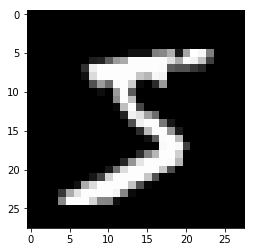

In [5]:
sampleImg = iter(dataset)
images, _ = sampleImg.next()
imShow(torchvision.utils.make_grid(images))
# plt.imshow(to_img(images))

In [6]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)        
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 784),
            # nn.ReLU(True)
            nn.Tanh()
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = AutoEncoder().cuda if IsCuda else AutoEncoder()
print model

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128)
    (1): ReLU(inplace)
    (2): Linear(in_features=128, out_features=64)
    (3): ReLU(inplace)
    (4): Linear(in_features=64, out_features=12)
    (5): ReLU(inplace)
    (6): Linear(in_features=12, out_features=3)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12)
    (1): ReLU(inplace)
    (2): Linear(in_features=12, out_features=64)
    (3): ReLU(inplace)
    (4): Linear(in_features=64, out_features=128)
    (5): ReLU(inplace)
    (6): Linear(in_features=128, out_features=784)
    (7): Tanh()
  )
)


In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = 1e-5)

In [ ]:
for epoch in range(num_epochs):
    for data in data_loader:
        img, _ = data
        # print img.shape
        img = img.view(img.size(0), -1)
        # print img.shape
        img = Variable(img).cuda() if IsCuda else Variable(img)
        
        # Forward
        output = model(img)
        loss = criterion(output, img)
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # Log
    # if epoch % 10 == 9:
    # print output.shape
    print 'Epoch [{}/{}], Loss:{:.4f}'.format(epoch+1, num_epochs, loss.data[0])
    pic = to_img(output.cpu().data)
    save_image(pic, './genImg/image_{}.png'.format(epoch))

torch.Size([96, 784])
Epoch [1/10], Loss:0.2078
torch.Size([96, 784])
Epoch [2/10], Loss:0.1766
torch.Size([96, 784])
Epoch [3/10], Loss:0.1736
torch.Size([96, 784])
Epoch [4/10], Loss:0.1669
torch.Size([96, 784])
Epoch [5/10], Loss:0.1497
torch.Size([96, 784])
Epoch [6/10], Loss:0.1413
torch.Size([96, 784])
Epoch [7/10], Loss:0.1523
torch.Size([96, 784])
Epoch [8/10], Loss:0.1458
